# Le Basics

_le basics di programmazione_

## Esempio

Esistono vari metodi per eseguire la stessa operazione, i vari "modi di fare" sono chiamati _paradigmi_. Il paradigma più comune è quello imperativo, in cui il problema viene risolto come una sequenza di operazioni.

Consideriamo per esempio come calcolare il fattoriale di $n$, ossia

$$ n! = 1 \cdot 2 \cdot 3 \cdots (n-1) \cdot n. $$

In [1]:
# we want the factorial of n, save this desired value
n = 3

f = 1
i = 1
# repeat the code block while condition is true
while i < n:
    i = i + 1  # increment i by one
    f = f * i  # multiply f with i and store it in f
    
print(f)

# using a for loop does the same
f = 1
for i in range(n):  # range(n) goes from 0 to n-1
    f = f * (i + 1)
    
print(f)

6
6


Questo problema può essere risolto in modi differenti usando paradigmi. Usiamo la sintassi `def f(x):` per definire la funzione $f(x)$ e costruiamo 3 funzioni che calcolano il fattoriale in modo differente.

In [2]:
from functools import reduce

def imperative_fac(n):
    # imperative approach, same as above
    f = 1
    for i in range(n):
        f *= i + 1
    return f

def recursive_fac(n):
    # by definition the factorial of 1 is one
    if n == 1:
        return 1
    
    # by definition the factorial of n is
    # n! = n * (n - 1) * (n - 2) ... 1 = n * (n - 1)!
    return n * recursive_fac(n - 1)

def functional_fac(n):
    # define the product function p
    def p(a, b):
        return a * b

    # given a list 1, 2, 3, 4
    # this computes p(p(p(1, 2), 3), 4)
    return reduce(p, range(1,10+1))

Questi sono i paradigmi più semplici ma interessanti, ne esistono molti altri, il più famoso non dimostrato è il paradigma ad oggetti (_object oriented_).

I vari approcci hanno performance differenti. In questo caso l'approccio recursivo è il più lento. Ciò è perché Python (il linguaggo di programmazione) non ha una feature chiamata tail call optimization. In altri casi la recursione è un modo efficiente di risolvere i problemi.

In [3]:
import time

# Measure time and print in microseconds
start = time.time()
imperative_fac(1000)
end = time.time() - start
print(end * 1e6)

start = time.time()
recursive_fac(1000)
end = time.time() - start
print(end * 1e6)

start = time.time()
functional_fac(1000)
end = time.time() - start
print(end * 1e6)

415.802001953125
446.319580078125
20.02716064453125


## Sintassi di Python

Questa è la parte noiosa dove c'é una lista di come si fanno le operazioni base in Python.

### Variabili

Le variabli si assegnano con `=`, il nome a sinistra e un'espressione a destra. Le variabili hanno un _tipo_. Il tipo più semplice è boleano (vero/falso):

In [4]:
# true or false values are booleans
b = True  # or False
print(type(b))

<class 'bool'>


Le operazioni boleane sono molto intuitive

In [5]:
x = True
y = False

print(x and y)
print(x or y)
print(not x)

False
True
False


I numeri sono `int`, `float` (o `complex`)

In [6]:
# whole numbers are integers
x = 7
print(type(x))

# numbers are called floating-point
f = 10.0
print(type(f))

# there are also complex numbers
z = 1 + 1j
print(type(z))

<class 'int'>
<class 'float'>
<class 'complex'>


I numeri hanno le solite operazioni aritmetiche

In [7]:
x = 7
y = 3

print(x + y)
print(x - y)
print(x * y)
print(x / y)   # floating point division

print(x // y)  # integer division
print(x % y)   # division remainder

10
4
21
2.3333333333333335
2
1


Il testo è composto da caratteri, una sequenza di caratteri è una stringa `str`:

In [8]:
s = "hello!"
print(type(s))

<class 'str'>


Le stringhe si possono concatenare con `+`

In [9]:
name = "baluba"
print("hello " + name)

hello baluba


Un'altra cosa utile sono le liste

In [10]:
# list is mutable, i.e. can be modified
array = [1, 2, 4]
print(type(array))

# access list elements with brackets
print(array[1])

# immutable list, i.e. cannot be modified, is called tuple
red = (255, 0, 0)
print(type(red))

# lists and tuples need not to be of the same thing
mix = (1, 4.0, "asdrubale")  # is (int, float, str)

# even list of lists
lol = [array, red]
print(lol)

<class 'list'>
2
<class 'tuple'>
[[1, 2, 4], (255, 0, 0)]


Delle librerie o del codice proprio può creare dei nuovi tipi

In [11]:
# numpy is a mathematical library
from numpy import matrix
m = matrix([[1, 3], [2, 3]])
print(type(m))
print(m)

# or another examples are dates
from datetime import datetime
today = datetime.today()
print(type(today))
print(today)

<class 'numpy.matrix'>
[[1 3]
 [2 3]]
<class 'datetime.datetime'>
2023-06-26 16:13:36.386768


Forse inaspettatamente anche le funzioni sono delle variabili:

In [12]:
def f(x):
    return x + 1

print(type(f))

<class 'function'>


### Flow Control

Come visto nell'esempio il codice viene eseguito dall'alto verso il basso una riga alla volta. Per eseguire una cosa piuttosto che un'altra oppure ripetere del codice più volte.

Con `if` e `elif` e `else` si può eseguire il codice in base ad una condizione. Le variabili si comparano per eguaglianza con `==`, maggiore `>` o minore `<`, maggiore uguale `<=` o minore uguale `>=`. Con le liste esiste `in`.

In [13]:
x = 10
y = 9

if x < y:
    print("x is smaller")
elif x > y:
    print("x is bigger")
else:
    print("they are the same")

fruits = ["banana", "orange", "apple"]
if "banana" in fruits:
    print("no shit sherlock")

x is bigger
no shit sherlock


Per ripetere del codice esistono `while` e `for`.

In [14]:
# note: this is a very inefficient way to wait 2 seconds
running = True
print("start")
start = time.time()
while running:
    delta = time.time() - start
    if delta > 2:
        running = False
        
print("end after 2 seconds")

start
end after 2 seconds


In [15]:
fruits = ["banana", "orange", "apple"]
for fruit in fruits:
    print(fruit)
    
# range(n) generates a list of number from 0 to n-1
for i in range(4):
    print(i)

banana
orange
apple
0
1
2
3


### Functions

Per dichiarare delle funzioni si usa `def name(arguments):`. Le funzioni possono essere nel senso matematico $f: \mathbb{R} \times \mathbb{R} \to \mathbb{R}, \; (x, y) \mapsto x + y$ oppure come del codice salvato in un nome

In [16]:
# function in a mathematical sense:
# takes imputs and returns outputs
def f(x, y):
    return x + y

# function in the sense of a procedure of code
# has no return value
def greet(name):
    print("hello " + name + "!")
    
z = f(1, 4)
print(z)
greet("asdrubale")

5
hello asdrubale!


# Project Euler

È una raccolta di problemi semplici per iniziare a capire come funziona la programmazione

## Problem 1

> If we list all the natural numbers below $10$ that are multiples of $3$ or $5$, we get $3, 5, 6$ and $9$. The sum of these multiples is $23$.
>
> Find the sum of all the multiples of $3$ or $5$ below $1000$.

In [17]:
x = 0
for n in range(1, 1001):
    if n%3 == 0 or n%5 == 0:
        x = n + x
    
print(x)

234168


In [18]:
r = range(1, 1001)

def f(n):
    return n%3 == 0 or n%5 == 0

m = sum(filter(f, r))

print(m)

234168


## Problem 2

> Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with $1$ and $2$, the first $10$ terms will be: 
>
> $$1, 2, 3, 5, 8, 13, 21, 34, 55, 89, \dots$$
>
> By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [19]:
x = 0
y = 1
tot = 0
while y < 4e6:
    n = x + y
    if n%2 == 0:
        tot = tot + n
    x = y
    y = n

print(tot)

4613732


In [20]:
from itertools import takewhile

def fibonacci():
    x = 0
    y = 1
    while True:
        n = x + y
        yield n
        x = y
        y = n

def is_small(n):
    return n < 4e6

def even(n):
    return n%2 == 0

sum(filter(even, takewhile(is_small, fibonacci())))

4613732

## Problem 3
> Write a program that automatically converts English text to Morse code and vice versa.

## Digital Image Processing

In [21]:
from cubesolver.webcam import Webcam

import cv2
import skimage
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [22]:
# Camera calibration
cam = Webcam(0, downscale=5)
cam.calibrate((6,5))

Try to open camera...
Camera opened successfully


2023-06-26 16:13:40.650 Python[34587:953798] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/w1/cmd2jfv1229gcxvtdyfg1vjc0000gn/T/org.python.python.savedState


failed to find chessboard
failed to find chessboard
failed to find chessboard
failed to find chessboard
failed to find chessboard
failed to find chessboard
failed to find chessboard
failed to find chessboard


KeyboardInterrupt: 

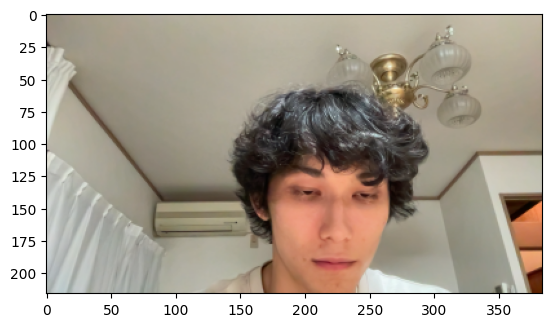

In [23]:
cam.open()
frame = np.zeros(1)
while np.allclose(0, frame):
    ret, frame = cam.get_frame()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cam.close()
plt.imshow(frame)

### Detecting with Edge Detection

In [ ]:
%%time
# Change to grayscale
frame_gray = skimage.color.rgb2gray(frame)
frame_gray_eq = skimage.exposure.equalize_adapthist(frame_gray)

# Get edges and do morphology
edges = skimage.feature.canny(frame_gray, 2)
footprint = skimage.morphology.disk(7)
edges_m = skimage.morphology.closing(edges, footprint)
edges_m = skimage.morphology.remove_small_holes(edges_m, 200)

# Find contours
contours = skimage.measure.find_contours(edges_m, fully_connected="high")

In [ ]:
print("found {} contours".format(len(contours)))
fig, ax = plt.subplots(1, 2, figsize=(12,7))
ax[1].imshow(edges_m)
ax[0].imshow(frame)
for ct in contours:
    ax[0].plot(ct[:, 1], ct[:, 0], linewidth=2)

In [26]:
%%time
# Compute centroids
centroids = []
for contour in contours:
    c = np.mean(contour, axis=0, dtype=np.int32)
    centroids.append(c)

centroids = np.vstack(centroids)

# Compute distances and angles
distances = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(centroids))
orthos = np.matmul(centroids, centroids.T) / (np.linalg.norm(centroids) ** 2)

NameError: name 'contours' is not defined

In [24]:
colors = frame[centroids[:, 0], centroids[:, 1], :]

fig, axes = plt.subplots(3,7)
for color, ax in zip(colors, axes.ravel()):
    ax.imshow(np.tile(color, (10,10,1)))

NameError: name 'centroids' is not defined

In [25]:
# Get inverse of camera matrix
camera_inv = np.linalg.pinv(cam.matrix)

# Unproject points in 3d space
points = np.vstack([centroids[:, 0], centroids[:, 1], np.ones((1, centroids.shape[0]))]).T
points = points @ camera_inv

# Perform a regression to find plane
z = points[:, 2]
a = np.linalg.pinv(points.T @ points) @ points.T @ z

NameError: name 'centroids' is not defined

In [ ]:
def are_grid(samples):
    distances = scipy.spatial.distance.pdist(samples) / np.mean(samples)
    orthos = np.unique(np.matmul(samples, samples.T) / (np.linalg.norm(samples) ** 2))

    dist_err = 0
    lenghts = [1, np.sqrt(2), 2, 2 * np.sqrt(2)]
    for d in distances:
        dist_err += np.min([np.abs(d - l) for l in lenghts])
        
    ortho_err = 0
    angles = [0, np.pi/4, -np.pi/4, np.pi/2, -np.pi/2, np.pi]
    for o in orthos:
        ortho_err += np.min([np.abs(o - a) for a in angles])
            
    return (dist_err, ortho_err)

err = np.inf
while err > 11:
    samples = centroids[np.random.choice(centroids.shape[0], 9)]
    err = sum(are_grid(samples))
print(err)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(frame)

ncontours = len(contours)
for i in range(ncontours):
    start = centroids[i, :]
    for j in range(ncontours):
        end = centroids[j, :]
        ax.plot([start[1], end[1]], [start[0], end[0]],
                marker="o", markerfacecolor="r", color="w",
                linewidth=.5, linestyle="dotted")
        
for c in samples:
    plt.plot([c[1]], [c[0]], marker="o", markerfacecolor="b")

plt.show()

### Detecting using Correlation Methods

In [ ]:
face = skimage.io.imread("face.png")
face = skimage.color.rgba2rgb(face)
face = skimage.color.rgb2gray(face)
face = skimage.transform.downscale_local_mean(face, 16)
face = skimage.exposure.equalize_adapthist(face)
plt.imshow(face)

In [ ]:
face_sift = skimage.feature.SIFT()
face_sift.detect_and_extract(face)

fr = skimage.exposure.equalize_adapthist(frame_gray)
fr_sift = skimage.feature.SIFT()
fr_sift.detect_and_extract(fr)

matches = skimage.feature.match_descriptors(fr_sift.descriptors, face_sift.descriptors)

fig, ax = plt.subplots(figsize=(24,10))
skimage.feature.plot_matches(ax, fr, face, fr_sift.keypoints, face_sift.keypoints, matches)
plt.show()